In [1]:
%load_ext autoreload
%autoreload 2
sys.path.append('../../src')

import os
import numpy as np
import pandas as pd
import datetime

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from utils.functions import load_datasets_from_csv


from paths import ROOT_DIR, FLLD_DB_DIR
IMG_PATH = ROOT_DIR+'/img/donut'


if not os.path.exists(IMG_PATH):
    os.mkdir(IMG_PATH)

In [2]:
dts = load_datasets_from_csv(FLLD_DB_DIR).copy()

In [3]:
sns.set_style({'font.family':'sans', 'font.serif':'Helvetica'})
sns.set_context(rc={"font.size":11,"axes.titlesize":12,"axes.labelsize":12}) 

In [4]:
E_wpump = dts['pump']['Pwr'].sum()/(30)
E_fan =  dts['fan']['Pwr'].sum()/(30)
E_pc =  dts['computer']['Pwr'].sum()/(30)
E_fridge =  dts['fridge']['Pwr'].sum()/(30)
E_air =  dts['air']['Pwr'].sum()/(30)
E_house =  dts['house']['Pwr'].sum()/(30)
E_others = E_house - (E_wpump+E_fan+E_pc+E_fridge+E_air)

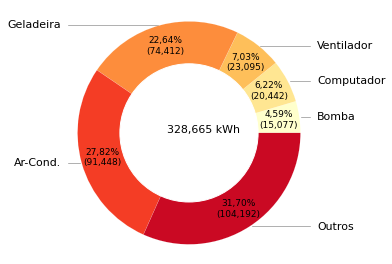

In [5]:
viridis = cm.get_cmap('YlOrRd_r', 7)
colors = viridis(range(7))
colors = colors[::-1]
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
energy_dict = dict(zip(["Bomba","Computador",'Ventilador','Geladeira','Ar-Cond.','Outros'],
                        [E_wpump,E_pc,E_fan,E_fridge, E_air, E_others]))
#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0.025, 0.025, 0.025, 0.025, 0.025, 0.045)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots(figsize=(5,3.8), sharex=True)

values = list(energy_dict.values())



wedges, texts, autotexts = ax.pie(energy_dict.values(), 
                        colors=colors,
                        #explode=explode, 
                        autopct=lambda p : '{:,.2f}%\n({:,.0f})'.format(p,p * sum(values)/100).replace('.',','),
                        #autopct='%1.2f%%',
                        pctdistance=0.81,
                        startangle=0, 
                        #wedgeprops = {'linewidth': 3},
                        rotatelabels=True
                        )
                                  
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


#draw circle
centre_circle = plt.Circle((0,0),0.62,fc='w',ec='w')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.text(-0.2 ,-0.00, "{} kWh".format(round(E_house/1000,3)).replace('.',','), 
#fontfamily='Times New Roman', 
fontsize=11)

for w in wedges:
    w.set_linewidth(0.1)
    w.set_edgecolor('w')

for text in texts:
    text.set_color('k')
    text.set_fontsize(10)
    text.set_fontfamily("sans")

for autotext in autotexts:
    autotext.set_color('k')
    autotext.set_fontsize(9)
    autotext.set_fontfamily("sans")


#plt.setp(autotexts, alpha=0.8)



bbox_props = dict(boxstyle="square,pad=0.5", fc="w", ec="w", lw=0.1)
kw = dict(arrowprops=dict(arrowstyle="-", alpha=0.3),
          bbox=bbox_props, zorder=-2, va="center")


recipe = ["Bomba",'Computador','Ventilador','Geladeira','Ar-Cond.', 'Outros']
for i, p in enumerate(wedges):

    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})

    ax.annotate(
        recipe[i], 
        xy=(x, y), 
        xytext=(1.15*np.sign(x), 1*y),
        horizontalalignment=horizontalalignment, 
        **kw, 
        fontsize=11, 
        fontfamily="sans"
        )

plt.tight_layout()

plt.savefig(IMG_PATH+"/pie.svg", dpi=600, pad_inches=0.08, bbox_inches='tight')